In [ ]:
import matplotlib.image as img
import numpy as np
import IPython.display as ipd
import pylab
import matplotlib.pyplot as plt

from microfaune import audio, plot

# List of species

In [ ]:
file = open('list_full_names.txt', 'r', encoding='utf-8')
file.readline()
list_full_names = file.read()
list_full_names = list_full_names.split('\n')
file = open('list_file_names.txt', 'r')
file.readline()
list_file_names = file.read()
list_file_names = list_file_names.split('\n')

# Select specie

Pigeon biset des villes


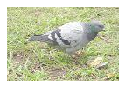

In [3]:
i = 37 # select index in the species list
full_name = list_full_names[i]
file_name = list_file_names[i]
print(full_name)

try:
    im = img.imread('images/'+file_name+'.png')
    shape_im = np.shape(im)
    pylab.rcParams['figure.figsize'] = (2, round(2/shape_im[0]*shape_im[1],2))
    plt.close()
    plt.imshow(im)
    plt.axis('off')
except:
    print('No audio found for this specie')
    im = img.imread('images/drawing_bird.png')
    pylab.rcParams['figure.figsize'] = (2, round(2/shape_im[0]*shape_im[1],2))
    plt.close()
    plt.imshow(im)
    plt.axis('off')

# Listen to audio

In [4]:
ipd.Audio('audio/species_mp3/'+file_name+'.mp3')

# Load audio

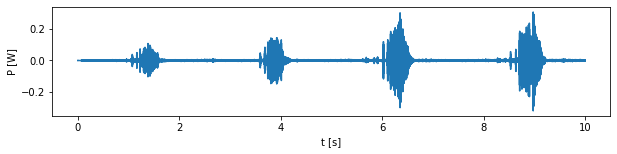

In [5]:
fs, data = audio.load_mp3('audio/species_mp3/' + file_name + '.mp3')
pylab.rcParams['figure.figsize'] = (10,2)
plt.close()
plot.plot_audio(fs, data[:int(fs*10)+1])

# Create spectrogram from the audio mp3

In [ ]:
# cut at 10 seconds if longer samples
[spec, t, f, x_fs] = audio.file2spec('audio/species_mp3/' + file_name + '.mp3', scale_spec = "linear",
                                           window_length=0.020, overlap=0.5, duration=10)
plot.plot_spec(spec, t, f, x_fs, scale_spec = "linear", plot_title="Linear spectogram",
          fig_size=(20,5), save_fig=False, save_path='spec_10sec_species/'+file_name+'.png', plot_main_frequencies=True)


# Compute spectrograms for all species from wav audio

In [ ]:
f_median_species = np.zeros((52,1))
f_min_species = np.zeros((52,1))
f_max_species = np.zeros((52,1))

for i in range(52): # select index in the species list
    file_name = list_file_names[i]
    full_name = list_full_names[i]
    
    print(str(i)+' '+full_name)

    # cut at 10 seconds if longer samples
    [spec, t, f, x_fs] = audio.file2spec('audio/species_wav/' + file_name + '.wav', scale_spec = "linear",
                                           window_length=0.020, overlap=0.5, duration=10)
    size_window = 20 * t[-1] / 10. # x scale proportionale to duration 
    plot.plot_spec(spec, t, f, x_fs, scale_spec = "linear", plot_title="Linear spectogram",
          fig_size=(size_window,5), save_fig=True, save_path='spec_10sec_species/'+file_name+'.png')

#    plot.plot_spec(spec, t, f, x_fs, scale_spec = "linear", plot_title="Linear spectogram",
#          fig_size=(20,5), save_fig=False, save_path='spec_10sec_species_main_freq/'+file_name+'.png', plot_main_frequencies=True)
#    [f_median, f_min, f_max] = plot.find_most_used_frequencies(f, spec)
#    f_median_species[i] = f_median
#    f_min_species[i] = f_min
#    f_max_species[i] = f_max
    
# np.savetxt('f_median_species_q95.txt',f_median_species)
# np.savetxt('f_min_species_q95.txt',f_min_species)
# np.savetxt('f_max_species_q95.txt',f_max_species)